In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

# objective function
def f(x,y):
    return (x**2 + y -11)**2 + (x + y**2 - 7)**2 #x**2 + y**2 + 1

def dfdx(x,y):
    return 4*x*(x**2+y-11)+2*x+2*y**2-14   #2*x

def dfdy(x,y):
    return 2*x**2+4*y*(x+y**2-7)+2*y-22   #2*y

# gradient vector [df/dx, df/dy] and partital derivates

def grad_vector(x,y):
  return np.array([dfdx(x,y),dfdy(x,y)])

def part_derivate(x,y, direction):
    if direction == 0:
      return np.array([dfdx(x,y), 0])
    else:
      return np.array([0, dfdy(x,y)])
    
def get_3d(x, y, z):
    fig = plt.figure(1, figsize = (7, 5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)
    plt.show()

def learning_rate(iteration_number, eta0, power_t):
  learning_rate = eta0/pow(iteration_number, power_t)
  return 0.2 #learning_rate

def contour_plot(x_seq,y_seq, x1):
    true_min = [[3,2],[-2.805118,3.131312],[-3.779310,-3.283186],[3.584428,-1.848126]]
    plt.figure(figsize=(7,7))
    CS = plt.contour(X, Y, Z, levels=[10, 20, 40, 60, 80, 100, 120, 150, 200, 300,400],cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    for i in range(4):
      plt.plot(true_min[i][0],true_min[i][1],'ko')
    plt.plot(x_seq,y_seq,'r--')
    plt.show()

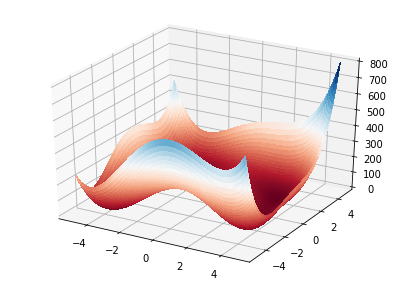

In [148]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
get_3d(X,Y,Z)

In [84]:
def SGD(x_prev, learn_rate, epsilon):
    
    iteration_number = 1
    eta0 = 1
    power_t = 1
    seq_x = []
    seq_y = []
    seq_x = np.append(seq_x, x_prev[0])
    seq_y = np.append(seq_y, x_prev[1])

    x_next = np.subtract(x_prev, learn_rate*part_derivate(x_prev[0],x_prev[1],0))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        direction = round(random())
        x_prev = x_next
        x_next = x_prev - learn_rate* part_derivate(x_prev[0],x_prev[1],direction)  
        iteration_number += 1 #add another iteration
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, iteration_number, seq_x, seq_y)

Minimum (x,y) from gradient descent: [3.00000355 1.99999757]
Number of gradient descent iterations: 51


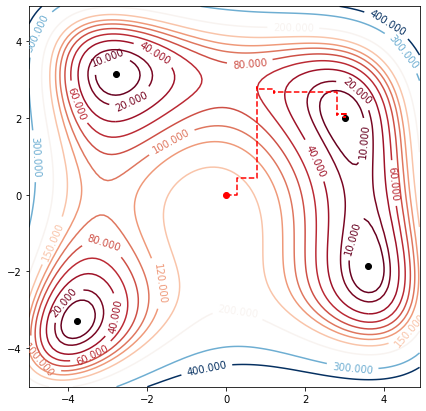

In [174]:
initial_guess = np.array([0,0])
epsilon = 0.000001
learning_rate = 0.02
grad_output = SGD(initial_guess, learning_rate, epsilon)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])
contour_plot(grad_output[2],grad_output[3], initial_guess)

#ADAM

In [86]:
def adam_optimizer(x_prev, step_size, beta1, beta2, epsilon):
  iteration_number = 0
  m = np.array([0,0])       #initialize the first moment vector
  v = np.array([0,0])       #initialize the second moment vector
  seq_x = []
  seq_y = []

  x_next = x_prev + 0.1
  seq_x = np.append(seq_x, x_next[0])
  seq_y = np.append(seq_y, x_next[1])
  
  while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
    iteration_number += 1

    x_prev = x_next

    #update moment vectors
    v = beta2 * v + (1 - beta2)*np.square(grad_vector(x_prev[0],x_prev[1]))
    m = beta1 * m  + (1 - beta1)*grad_vector(x_prev[0],x_prev[1])

    #compute bias correction vectors 
    v_est = v / (1 - pow(beta1, iteration_number))
    m_est = m / (1 - pow(beta2, iteration_number))

    x_next = np.subtract(x_prev, step_size*m_est / (np.sqrt(v_est) + epsilon))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    iteration_number+=1

  return (x_next, iteration_number, seq_x,  seq_y)

Minimum (x,y) from gradient descent: [3.00001367 1.99997115]
Number of gradient descent iterations: 438


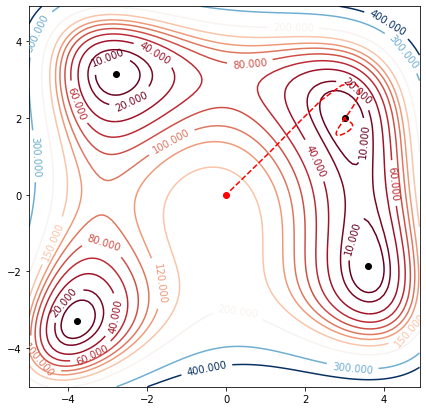

In [175]:
initial_guess = np.array([0,0])
learning_rate = 0.2
step_size = 0.001
beta1 =   0.9
beta2 = 0.999
epsilon = 0.000001
learning_rate = 0.05
adam_output = adam_optimizer(initial_guess, step_size, beta1, beta2, epsilon)

print('Minimum (x,y) from gradient descent: %s' %adam_output[0])
print('Number of gradient descent iterations: %s' %adam_output[1])
contour_plot(adam_output[2],adam_output[3], initial_guess)